# Project 2 

 Citation: 
 
 ECON628 lecture notes
 
 Lending up machine learning tutorial

In [1]:
# preperation: import data modules 
import numpy as np
import scipy.stats as stats
import pandas as pd

# preperation: import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# make sure charts appear in the notebook:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

The excel file contains two sheets, sheet1--data; sheet2-- data description.

In [2]:
### loading sheet 1
loans = pd.read_csv('/Users/zerindong/Desktop/ECON628-01-zerin5577/projects/jaypeedevlin-lending-club-loan-data-2007-11/lending_club_loans.csv', skiprows=1) 

/Applications/Utilities/anaconda/envs/econ/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
loans.shape

(42538, 115)

In [4]:
loans.describe().T

/Applications/Utilities/anaconda/envs/econ/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,count,mean,std,min,25%,50%,75%,max
member_id,42535.0,825702.551170,279540.905635,70473.00,NaN,NaN,NaN,1.314167e+06
loan_amnt,42535.0,11089.722581,7410.938391,500.00,NaN,NaN,NaN,3.500000e+04
funded_amnt,42535.0,10821.585753,7146.914675,500.00,NaN,NaN,NaN,3.500000e+04
funded_amnt_inv,42535.0,10139.830603,7131.686447,0.00,NaN,NaN,NaN,3.500000e+04
installment,42535.0,322.623063,208.927216,15.67,NaN,NaN,NaN,1.305190e+03
annual_inc,42531.0,69136.556420,64096.349719,1896.00,NaN,NaN,NaN,6.000000e+06
dti,42535.0,13.373043,6.726315,0.00,NaN,NaN,NaN,2.999000e+01
delinq_2yrs,42506.0,0.152449,0.512406,0.00,NaN,NaN,NaN,1.300000e+01
fico_range_low,42535.0,713.052545,36.188439,610.00,NaN,NaN,NaN,8.250000e+02
fico_range_high,42535.0,717.052545,36.188439,614.00,NaN,NaN,NaN,8.290000e+02


In [5]:
loans.isnull().sum()

id                                    0
member_id                             3
loan_amnt                             3
funded_amnt                           3
funded_amnt_inv                       3
term                                  3
int_rate                              3
installment                           3
grade                                 3
sub_grade                             3
emp_title                          2627
emp_length                            3
home_ownership                        3
annual_inc                            7
verification_status                   3
issue_d                               3
loan_status                           3
pymnt_plan                            3
url                                   3
desc                              13295
purpose                               3
title                                15
zip_code                              3
addr_state                            3
dti                                   3


In [6]:
### drop the columns that including too many missing values (threshold--50% missing)
half_loans= len(loans) / 2
loans= loans.dropna(thresh=half_loans,axis=1)
### drop the columns are not helpful at all
loans= loans.drop(['url','desc'],axis=1)

In [7]:
loans.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,744.0,740.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,499.0,0.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,719.0,715.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [8]:
loans.shape

(42538, 56)

In [9]:
### loading sheet2
desc = pd.read_csv('/Users/zerindong/Desktop/ECON628-01-zerin5577/projects/jaypeedevlin-lending-club-loan-data-2007-11/LCDataDictionary.csv') 

In [10]:
desc.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


In [11]:
desc.shape

(117, 2)

In [12]:
desc= desc.rename(columns={'LoanStatNew': 'name',
                           'Description': 'description'})

In [13]:
desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 2 columns):
name           115 non-null object
description    116 non-null object
dtypes: object(2)
memory usage: 1.9+ KB


In [14]:
### merge sheet 1 (variable name) and sheet2 (description)
### drop redundant columns

loans_dtypes = pd.DataFrame(loans.dtypes,columns=['dtypes'])
loans_dtypes = loans_dtypes.reset_index()
loans_dtypes['name'] = loans_dtypes['index']
loans_dtypes = loans_dtypes[['name','dtypes']]

view = loans_dtypes.merge(desc, on='name',how='left') 

In [15]:
print view

                          name   dtypes  \
0                           id   object   
1                    member_id  float64   
2                    loan_amnt  float64   
3                  funded_amnt  float64   
4              funded_amnt_inv  float64   
5                         term   object   
6                     int_rate   object   
7                  installment  float64   
8                        grade   object   
9                    sub_grade   object   
10                   emp_title   object   
11                  emp_length   object   
12              home_ownership   object   
13                  annual_inc  float64   
14         verification_status   object   
15                     issue_d   object   
16                 loan_status   object   
17                  pymnt_plan   object   
18                     purpose   object   
19                       title   object   
20                    zip_code   object   
21                  addr_state   object   
22         

In [16]:
loans.isnull().sum()

id                               0
member_id                        3
loan_amnt                        3
funded_amnt                      3
funded_amnt_inv                  3
term                             3
int_rate                         3
installment                      3
grade                            3
sub_grade                        3
emp_title                     2627
emp_length                       3
home_ownership                   3
annual_inc                       7
verification_status              3
issue_d                          3
loan_status                      3
pymnt_plan                       3
purpose                          3
title                           15
zip_code                         3
addr_state                       3
dti                              3
delinq_2yrs                     32
earliest_cr_line                32
fico_range_low                   3
fico_range_high                  3
inq_last_6mths                  32
open_acc            

In [17]:
loans.drop(['id','member_id','emp_title','pub_rec_bankruptcies','issue_d','sub_grade','funded_amnt','funded_amnt_inv',
            'zip_code','revol_util','int_rate','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp',
            'total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt',
            'collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens','last_credit_pull_d','delinq_2yrs',
            'earliest_cr_line','pymnt_plan','pub_rec','policy_code','acc_now_delinq','delinq_amnt','application_type',
            'initial_list_status'
    ],axis=1, inplace=True)

In [18]:
loans.isnull().sum()

loan_amnt                3
term                     3
installment              3
grade                    3
emp_length               3
home_ownership           3
annual_inc               7
verification_status      3
loan_status              3
purpose                  3
title                   15
addr_state               3
dti                      3
fico_range_low           3
fico_range_high          3
inq_last_6mths          32
open_acc                32
revol_bal                3
total_acc               32
last_fico_range_high     3
last_fico_range_low      3
dtype: int64

In [19]:
loans.head()

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,...,addr_state,dti,fico_range_low,fico_range_high,inq_last_6mths,open_acc,revol_bal,total_acc,last_fico_range_high,last_fico_range_low
0,5000.0,36 months,162.87,B,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,...,AZ,27.65,735.0,739.0,1.0,3.0,13648.0,9.0,744.0,740.0
1,2500.0,60 months,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,...,GA,1.00,740.0,744.0,5.0,3.0,1687.0,4.0,499.0,0.0
2,2400.0,36 months,84.33,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,...,IL,8.72,735.0,739.0,2.0,2.0,2956.0,10.0,719.0,715.0
3,10000.0,36 months,339.31,C,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,...,CA,20.00,690.0,694.0,1.0,10.0,5598.0,37.0,604.0,600.0
4,3000.0,60 months,67.79,B,1 year,RENT,80000.0,Source Verified,Current,other,...,OR,17.94,695.0,699.0,0.0,15.0,27783.0,38.0,694.0,690.0


In [20]:
### drop the rows that contain missing value
loans =loans.dropna()

In [21]:
loans.isnull().sum()

loan_amnt               0
term                    0
installment             0
grade                   0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
title                   0
addr_state              0
dti                     0
fico_range_low          0
fico_range_high         0
inq_last_6mths          0
open_acc                0
revol_bal               0
total_acc               0
last_fico_range_high    0
last_fico_range_low     0
dtype: int64

In [22]:
loans

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,...,addr_state,dti,fico_range_low,fico_range_high,inq_last_6mths,open_acc,revol_bal,total_acc,last_fico_range_high,last_fico_range_low
0,5000.0,36 months,162.87,B,10+ years,RENT,24000.00,Verified,Fully Paid,credit_card,...,AZ,27.65,735.0,739.0,1.0,3.0,13648.0,9.0,744.0,740.0
1,2500.0,60 months,59.83,C,< 1 year,RENT,30000.00,Source Verified,Charged Off,car,...,GA,1.00,740.0,744.0,5.0,3.0,1687.0,4.0,499.0,0.0
2,2400.0,36 months,84.33,C,10+ years,RENT,12252.00,Not Verified,Fully Paid,small_business,...,IL,8.72,735.0,739.0,2.0,2.0,2956.0,10.0,719.0,715.0
3,10000.0,36 months,339.31,C,10+ years,RENT,49200.00,Source Verified,Fully Paid,other,...,CA,20.00,690.0,694.0,1.0,10.0,5598.0,37.0,604.0,600.0
4,3000.0,60 months,67.79,B,1 year,RENT,80000.00,Source Verified,Current,other,...,OR,17.94,695.0,699.0,0.0,15.0,27783.0,38.0,694.0,690.0
5,5000.0,36 months,156.46,A,3 years,RENT,36000.00,Source Verified,Fully Paid,wedding,...,AZ,11.20,730.0,734.0,3.0,9.0,7963.0,12.0,679.0,675.0
6,7000.0,60 months,170.08,C,8 years,RENT,47004.00,Not Verified,Fully Paid,debt_consolidation,...,NC,23.51,690.0,694.0,1.0,7.0,17726.0,11.0,654.0,650.0
7,3000.0,36 months,109.43,E,9 years,RENT,48000.00,Source Verified,Fully Paid,car,...,CA,5.35,660.0,664.0,2.0,4.0,8221.0,4.0,689.0,685.0
8,5600.0,60 months,152.39,F,4 years,OWN,40000.00,Source Verified,Charged Off,small_business,...,CA,5.55,675.0,679.0,2.0,11.0,5210.0,13.0,499.0,0.0
9,5375.0,60 months,121.45,B,< 1 year,RENT,15000.00,Verified,Charged Off,other,...,TX,18.08,725.0,729.0,0.0,2.0,9279.0,3.0,519.0,515.0


In [23]:
### modify data type
cols = ['grade','verification_status', 'emp_length', 'term']
for name in cols:
    print name
    print loans[name].value_counts(),'\n'

grade
B    12376
A    10171
C     8731
D     6012
E     3392
F     1300
G      512
Name: grade, dtype: int64 

verification_status
Not Verified       18723
Verified           13469
Source Verified    10302
Name: verification_status, dtype: int64 

emp_length
10+ years    9364
< 1 year     5043
2 years      4742
3 years      4362
4 years      3647
1 year       3591
5 years      3456
6 years      2372
7 years      1874
8 years      1592
9 years      1340
n/a          1111
Name: emp_length, dtype: int64 

term
 36 months    31497
 60 months    10997
Name: term, dtype: int64 



In [24]:
### replace "month" with "", covert "term" into integer
loans['term'] = loans['term'].str.replace('months','')
loans.term = loans.term.convert_objects(convert_numeric=True)

/Applications/Utilities/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


In [25]:
loans['grade']=loans['grade'].str.replace('A','1')
loans['grade']=loans['grade'].str.replace('B','2')
loans['grade']=loans['grade'].str.replace('C','3')
loans['grade']=loans['grade'].str.replace('D','4')
loans['grade']=loans['grade'].str.replace('E','5')
loans['grade']=loans['grade'].str.replace('F','6')
loans['grade']=loans['grade'].str.replace('G','7')
loans.grade = loans.grade.convert_objects(convert_numeric=True)

/Applications/Utilities/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [26]:
loans.head()

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,...,addr_state,dti,fico_range_low,fico_range_high,inq_last_6mths,open_acc,revol_bal,total_acc,last_fico_range_high,last_fico_range_low
0,5000.0,36,162.87,2,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,...,AZ,27.65,735.0,739.0,1.0,3.0,13648.0,9.0,744.0,740.0
1,2500.0,60,59.83,3,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,...,GA,1.00,740.0,744.0,5.0,3.0,1687.0,4.0,499.0,0.0
2,2400.0,36,84.33,3,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,...,IL,8.72,735.0,739.0,2.0,2.0,2956.0,10.0,719.0,715.0
3,10000.0,36,339.31,3,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,...,CA,20.00,690.0,694.0,1.0,10.0,5598.0,37.0,604.0,600.0
4,3000.0,60,67.79,2,1 year,RENT,80000.0,Source Verified,Current,other,...,OR,17.94,695.0,699.0,0.0,15.0,27783.0,38.0,694.0,690.0


In [27]:
### replace the values in variale "emp_length"
loans_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0
        }
    }
    
loans = loans.replace(loans_dict)

In [28]:
loans.head()

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,...,addr_state,dti,fico_range_low,fico_range_high,inq_last_6mths,open_acc,revol_bal,total_acc,last_fico_range_high,last_fico_range_low
0,5000.0,36,162.87,2,10,RENT,24000.0,Verified,Fully Paid,credit_card,...,AZ,27.65,735.0,739.0,1.0,3.0,13648.0,9.0,744.0,740.0
1,2500.0,60,59.83,3,0,RENT,30000.0,Source Verified,Charged Off,car,...,GA,1.00,740.0,744.0,5.0,3.0,1687.0,4.0,499.0,0.0
2,2400.0,36,84.33,3,10,RENT,12252.0,Not Verified,Fully Paid,small_business,...,IL,8.72,735.0,739.0,2.0,2.0,2956.0,10.0,719.0,715.0
3,10000.0,36,339.31,3,10,RENT,49200.0,Source Verified,Fully Paid,other,...,CA,20.00,690.0,694.0,1.0,10.0,5598.0,37.0,604.0,600.0
4,3000.0,60,67.79,2,1,RENT,80000.0,Source Verified,Current,other,...,OR,17.94,695.0,699.0,0.0,15.0,27783.0,38.0,694.0,690.0


In [29]:
### take the average of FICO score
loans['fico_average'] = (loans['fico_range_high'] + loans['fico_range_low']) / 2

In [30]:
loans.head()

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,...,dti,fico_range_low,fico_range_high,inq_last_6mths,open_acc,revol_bal,total_acc,last_fico_range_high,last_fico_range_low,fico_average
0,5000.0,36,162.87,2,10,RENT,24000.0,Verified,Fully Paid,credit_card,...,27.65,735.0,739.0,1.0,3.0,13648.0,9.0,744.0,740.0,737.0
1,2500.0,60,59.83,3,0,RENT,30000.0,Source Verified,Charged Off,car,...,1.00,740.0,744.0,5.0,3.0,1687.0,4.0,499.0,0.0,742.0
2,2400.0,36,84.33,3,10,RENT,12252.0,Not Verified,Fully Paid,small_business,...,8.72,735.0,739.0,2.0,2.0,2956.0,10.0,719.0,715.0,737.0
3,10000.0,36,339.31,3,10,RENT,49200.0,Source Verified,Fully Paid,other,...,20.00,690.0,694.0,1.0,10.0,5598.0,37.0,604.0,600.0,692.0
4,3000.0,60,67.79,2,1,RENT,80000.0,Source Verified,Current,other,...,17.94,695.0,699.0,0.0,15.0,27783.0,38.0,694.0,690.0,697.0


In [31]:
drop_col=['fico_range_high','fico_range_low','last_fico_range_low','last_fico_range_high']
loans=loans.drop(drop_col,axis=1)

In [32]:
loans.head()

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,addr_state,dti,inq_last_6mths,open_acc,revol_bal,total_acc,fico_average
0,5000.0,36,162.87,2,10,RENT,24000.0,Verified,Fully Paid,credit_card,Computer,AZ,27.65,1.0,3.0,13648.0,9.0,737.0
1,2500.0,60,59.83,3,0,RENT,30000.0,Source Verified,Charged Off,car,bike,GA,1.00,5.0,3.0,1687.0,4.0,742.0
2,2400.0,36,84.33,3,10,RENT,12252.0,Not Verified,Fully Paid,small_business,real estate business,IL,8.72,2.0,2.0,2956.0,10.0,737.0
3,10000.0,36,339.31,3,10,RENT,49200.0,Source Verified,Fully Paid,other,personel,CA,20.00,1.0,10.0,5598.0,37.0,692.0
4,3000.0,60,67.79,2,1,RENT,80000.0,Source Verified,Current,other,Personal,OR,17.94,0.0,15.0,27783.0,38.0,697.0


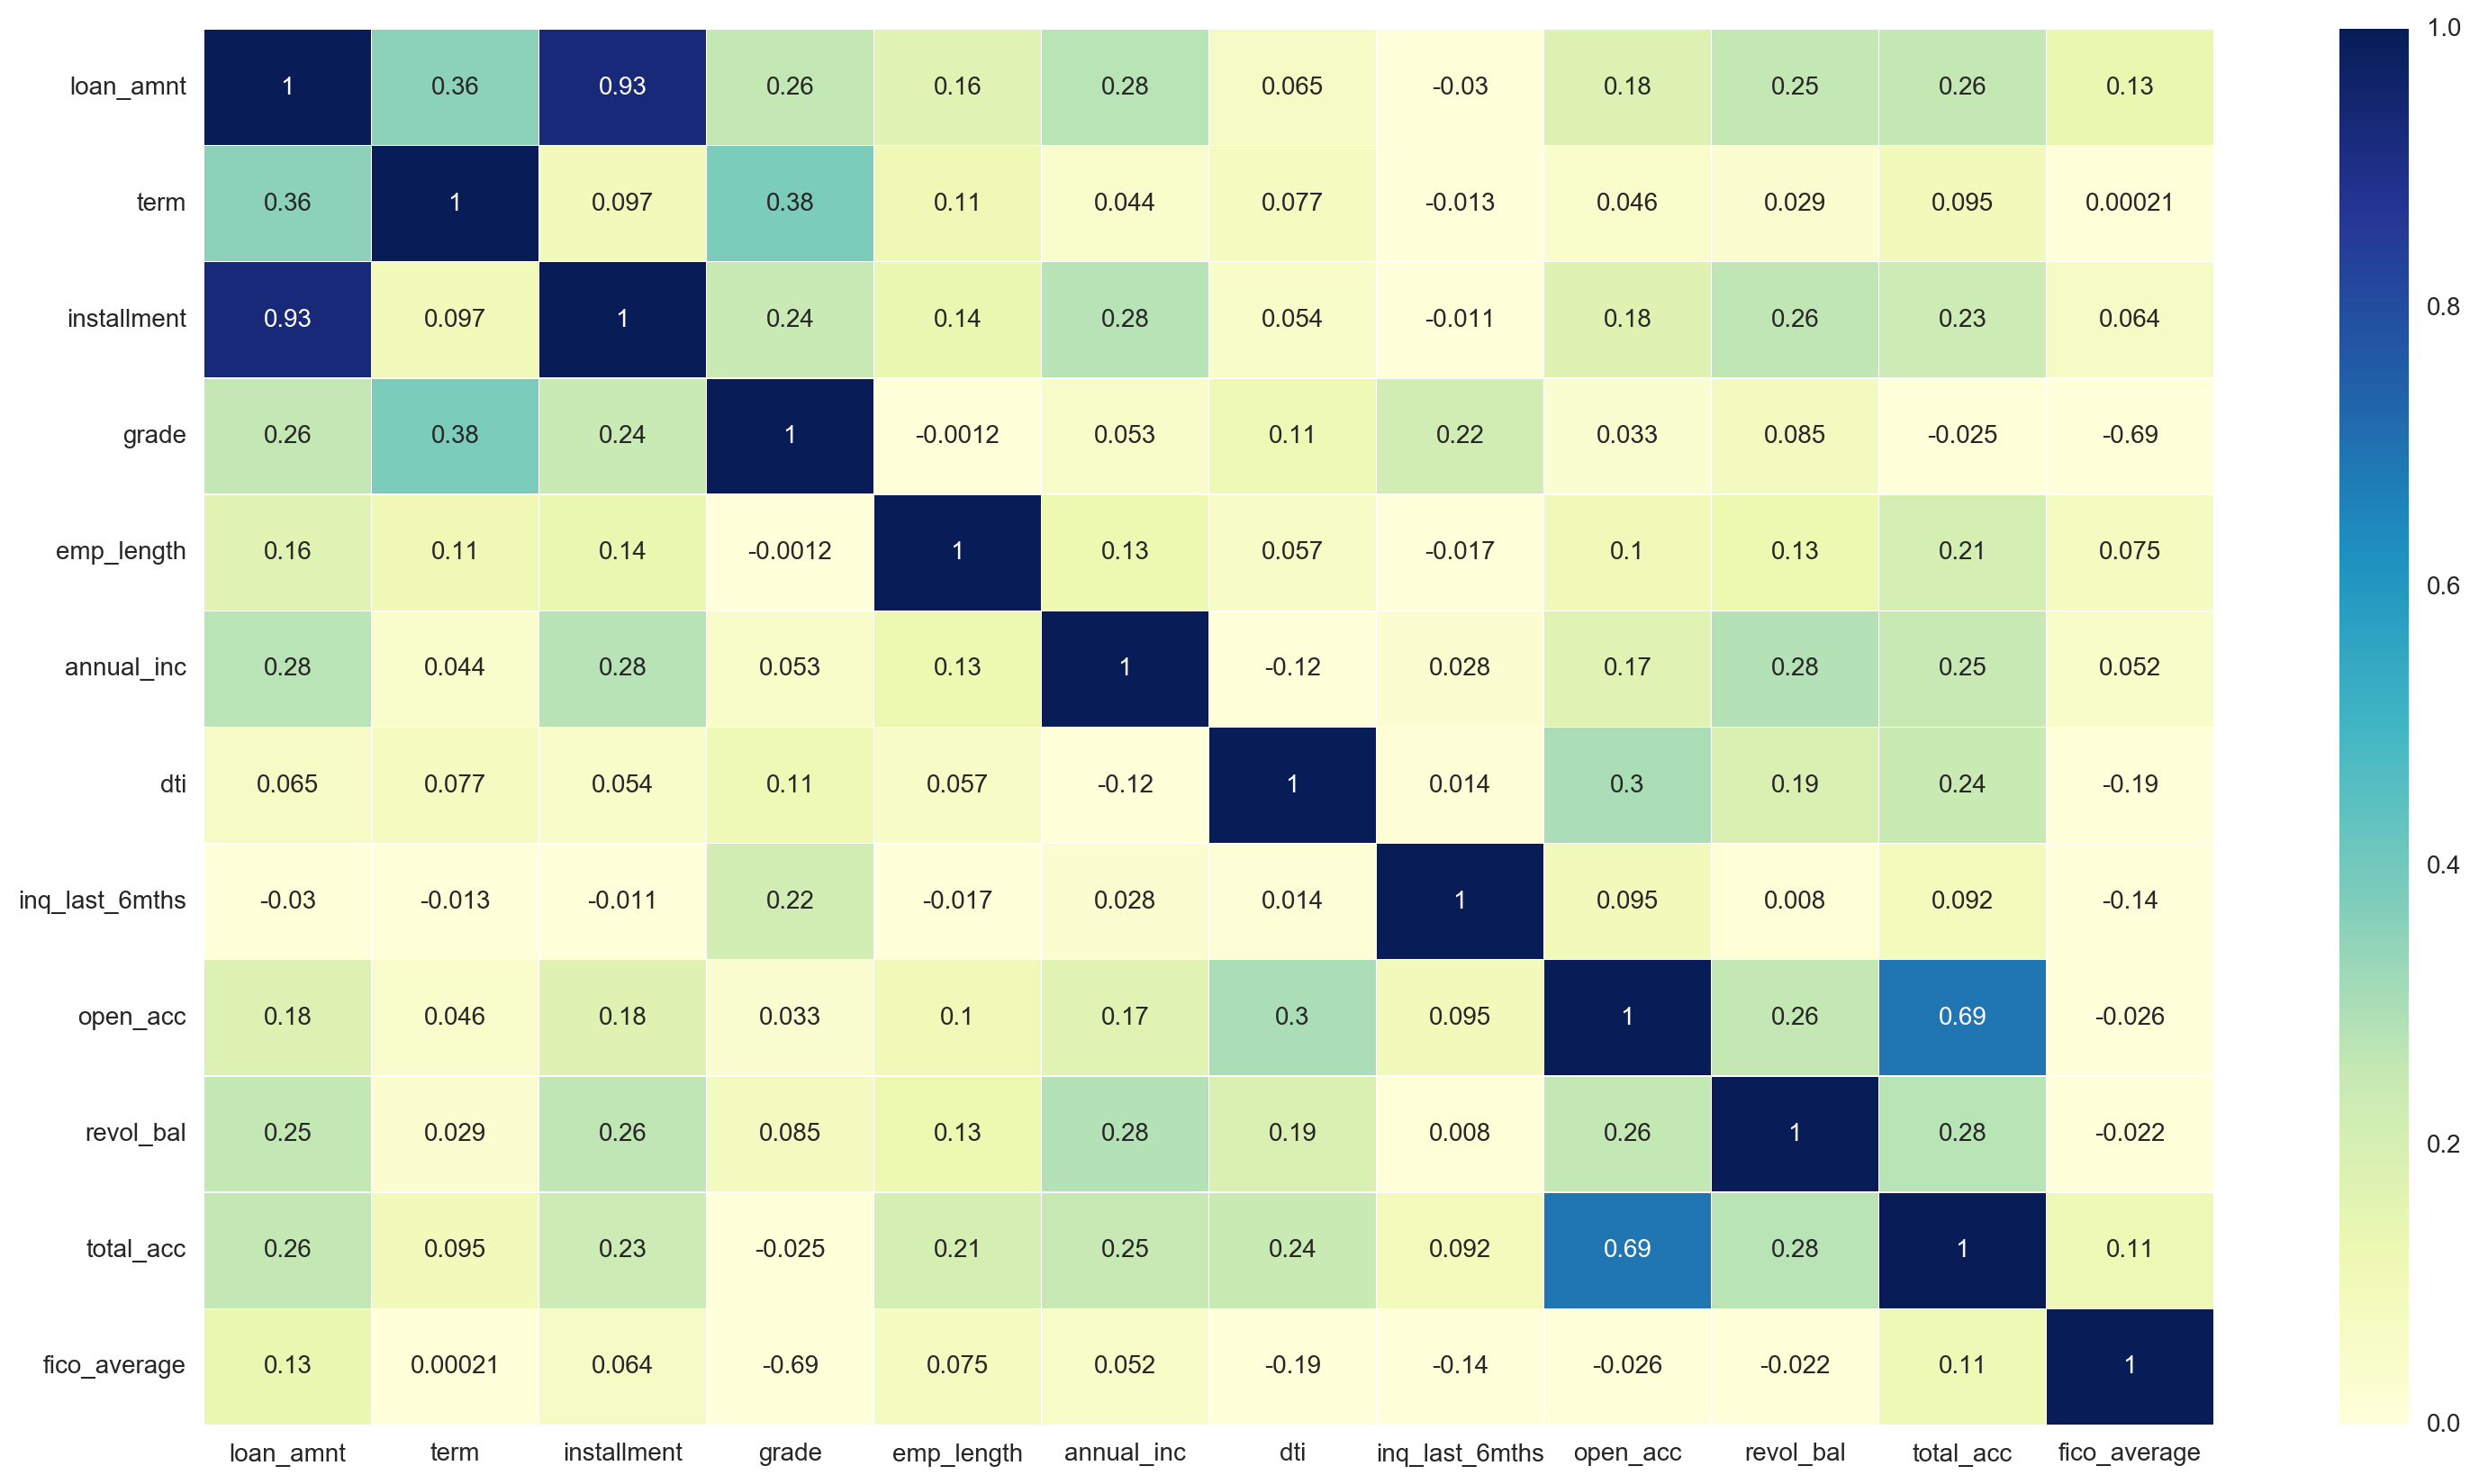

In [33]:
### correlation matrix
fig = plt.figure(figsize=(18,10))
ax = fig.gca()
sns.heatmap(loans.corr(), annot=True, linewidths=.15, cmap="YlGnBu", vmin=0, vmax=1, ax=ax)
plt.show()

In [34]:
## group by different features
loans.groupby(['purpose'], sort=True)[['loan_amnt']].sum().sort_values(by=['loan_amnt'],ascending=False).reset_index()

,purpose,loan_amnt
0,debt_consolidation,248341150.0
1,credit_card,63583000.0
2,home_improvement,36449750.0
3,other,34997325.0
4,small_business,27195075.0
5,major_purchase,18676125.0
6,car,10917925.0
7,wedding,9791700.0
8,medical,6137150.0
9,house,5360625.0


In [35]:
loans.groupby(['addr_state'], sort=True)[['loan_amnt']].sum().sort_values(by=['loan_amnt'],ascending=False).reset_index()

,addr_state,loan_amnt
0,CA,83824075.0
1,NY,45326750.0
2,TX,33741900.0
3,FL,32878250.0
4,NJ,23079825.0
5,IL,19028675.0
6,PA,17336075.0
7,VA,17069625.0
8,GA,16811500.0
9,MA,16156475.0


In [36]:
loans.groupby(['addr_state'], sort=True)[['fico_average']].mean().sort_values(by=['fico_average'],ascending=False).reset_index()

,addr_state,fico_average
0,WV,720.903743
1,OK,720.401899
2,VT,719.982456
3,SC,719.566462
4,MI,719.368090
5,AL,718.446281
6,NH,718.382979
7,MT,718.197917
8,LA,718.065217
9,NM,718.000000
